# Longitudinal Study of Demented and Nondemented Adults Data Analysis
## Magnetic Resonance Imaging and Clinical Assesment data Comparisons. 

In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm 

sns.set_style("whitegrid")


#### Reading the data

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
longitudinal = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_project_dementia/oasis_longitudinal.csv')

### Data explanation

http://www.oasis-brains.org/#data

#### Longitudinal Summary

> This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.
> 
*Open Access Series of Imaging Studies (OASIS): Longitudinal MRI Data in Nondemented and Demented Older Adults
Marcus, DS, Fotenos, AF, Csernansky, JG, Morris, JC, Buckner, RL, 2010. Journal of Cognitive Neuroscience, 22, 2677-2684. doi: 10.1162/jocn.2009.21407*

In [180]:
longitudinal.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


#### Column descriptions
* **ID**

The random subject ID uses the format
OAS1_xxxx, where ‘xxxx’ represents a number from 00001 to 9999 (e.g., OAS1_0012). For each of a
subject’s imaging sessions, an ID has been assigned of the format OAS1_xxxx_MRy, where y represents
an incrementing number to reflect the imaging visit number for the subject (e.g., OAS1_0012_MR1).

**Demographics**

* **M/F** Gender
* **Hand** Handedness 
* **Age**,
* **Educ** Education codes correspond to the years of education
* **SES** Socioeconomic status  (Rubin et al.,1998). assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status).

**Clinical**

* Mini-Mental State Examination (**MMSE**) (Rubin et al., 1998),  (range is from 0 = worst to 30 = best)
* Clinical Dementia Rating (**CDR**; 0=nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia) (Morris, 1993). All participants with dementia (CDR >0) were diagnosed with probable AD. 

**Derived anatomic volumes**

* **eTIV** Estimated total intracranial volume (mm3) (Buckner et al., 2004),
* **nWBV** Normalized whole brain volume.

    Expressed as the percent of all
    voxels in the atlas-masked image
    that are labeled as gray or white
    matter by the automated tissue
    segmentation process (Fotenos
    et al., 2005)

* **ASF** Atlas scaling factor

 Computed scaling factor (unitless)
that transforms native-space brain
and skull to the atlas target (i.e.,
the determinant of the transform
matrix) (Buckner et al., 2004)

Additionally, a reliability data set is included containing 20 subjects without dementia imaged on a subsequent visit within 90 days of their initial session.
* **Delay** days after the first scan


In [181]:
longitudinal.shape

(373, 15)

 ### Data cleaning
* Dropped the Hand column (all subjects are right handed)
* Dropped the ASF column (not relevant to my analysis)
* Renaming columns for easier access

In [0]:
longitudinal = longitudinal.drop(columns=['Hand', 'ASF'])
longitudinal = longitudinal.rename(columns={'Subject ID': 'Subject_ID', 'MRI ID': 'MRI_ID', 'MR Delay': 'MRI_Delay', 'EDUC': 'Educ', 'M/F':'Gender'})

### **Data Exploration:**

* Which columns are Numeric
* Which columns have missing values and how many
* Inspecting categorical data
* How many subjects were involved and MRI sessions performed
* Subjects who were converted

In [183]:
print(np.issubdtype(type(np.NaN), np.number))
numeric_cols = list(longitudinal.select_dtypes(include=[np.number]).columns.values)

print('Numeric columns: ', numeric_cols)

True
Numeric columns:  ['Visit', 'MRI_Delay', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV']


In [0]:
longitudinal['nWBV']*=100

In [185]:
print(longitudinal.isna().sum())

Subject_ID     0
MRI_ID         0
Group          0
Visit          0
MRI_Delay      0
Gender         0
Age            0
Educ           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
dtype: int64


In [186]:
print(longitudinal.Gender.unique())
print(longitudinal.Group.unique())
print(longitudinal.MRI_ID.duplicated().any())

['M' 'F']
['Nondemented' 'Demented' 'Converted']
False


In [187]:
print('There is ', longitudinal.Subject_ID.unique().size, ' subjects')
print('There is ', longitudinal.iloc[-1].name + 1, 'MRI sessions')

There is  150  subjects
There is  373 MRI sessions


In [188]:
converted_subjects = list(longitudinal[longitudinal['Group'].str.contains('Converted')]['Subject_ID'])
mask = longitudinal.Subject_ID.isin(converted_subjects)
converted_subjects = longitudinal[mask]
converted_subjects

,Subject_ID,MRI_ID,Group,Visit,MRI_Delay,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,87,14,1.0,30.0,0.0,1406,71.5
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,88,14,1.0,29.0,0.0,1398,71.3
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,92,14,1.0,27.0,0.5,1423,69.6
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,80,20,1.0,29.0,0.0,1587,69.3
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,82,20,1.0,28.0,0.5,1606,67.7
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,84,20,1.0,26.0,0.5,1597,66.6
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,86,12,3.0,30.0,0.0,1430,71.8
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,88,12,3.0,30.0,0.0,1445,71.9
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,91,12,3.0,28.0,0.5,1463,69.6
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,71,16,1.0,27.0,0.0,1289,77.1


**After this brief inspection it seems that the data is fairly clean.**

Test Hypothesis that MMSE, SES, eTIV, nWBW, Age, education reflects on CDR
Education and MMSE 
SES and Educ
iskirti converted zmones
palyginti nondemented su demented

1. Use at least 5 charts.
2. Use a pie chart. Gender
3. Use a bar chart.
4. Use a histogram.
5. Use a boxplot.
scatter plot
heatmap?
also use data describe
if i have more than 2 categories use anova instead of stjudent

### Data Description

In [189]:
longitudinal.describe()

,Visit,MRI_Delay,Age,Educ,SES,MMSE,CDR,eTIV,nWBV
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,72.956836
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,3.713502
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,64.400000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,70.000000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,72.900000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,75.600000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,83.700000


In [0]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} subj.)".format(pct, absolute)\
  
# Swap function 
def swapPositions(list, pos1, pos2): 
      
    list[pos1], list[pos2] = list[pos2], list[pos1] 
    return list
#longitudinal.groupby(['Gender', 'Group']).nunique()['Subject_ID']

### Pie Chart


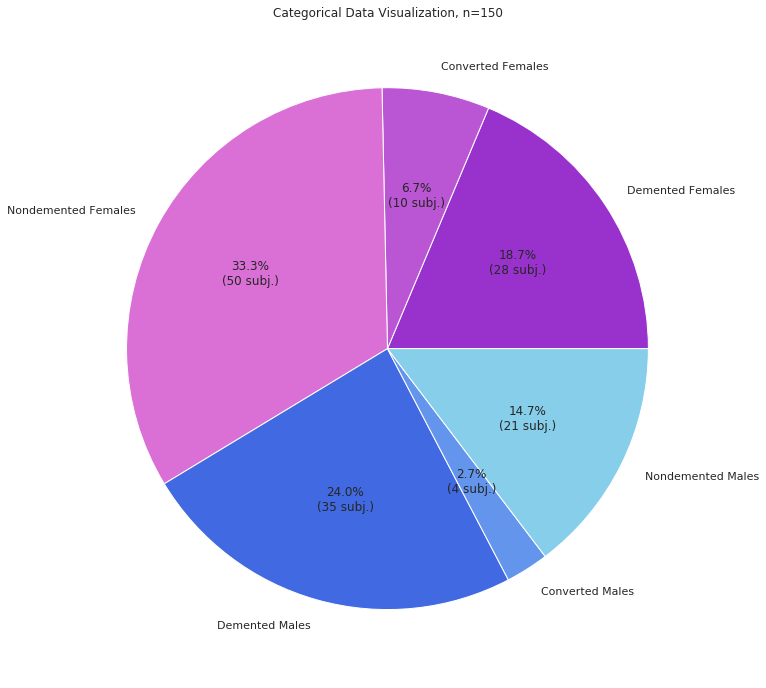

In [191]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))

subjects_by_gen_grp = longitudinal.groupby(['Gender', 'Group']).nunique()['Subject_ID'].values
labels_by_gen_grp = longitudinal.groupby(['Gender', 'Group']).nunique()['Subject_ID'].index.codes
ax.set_title('Categorical Data Visualization, n=150')

gender = {0 : 'Females', 1:'Males'}
group = {0:'Converted', 1:'Demented', 2:'Nondemented'}

labels_gender = list(map(gender.get, labels_by_gen_grp[0]))
labels_group = list(map(group.get, labels_by_gen_grp[1]))
labels=list(map(lambda x, y: x+ ' ' +y, labels_group, labels_gender))

clrs = ['darkorchid', 'mediumorchid', 'orchid', 'royalblue', 'cornflowerblue', 'skyblue']

labels = swapPositions(labels, 0, 1)
labels = swapPositions(labels, 3, 4)
subjects_by_gen_grp = swapPositions(subjects_by_gen_grp, 0, 1)
subjects_by_gen_grp = swapPositions(subjects_by_gen_grp, 3, 4)


ax.pie(subjects_by_gen_grp,labels=labels,colors = clrs, autopct=lambda pct: func(pct, subjects_by_gen_grp))

plt.show()


### Box Plot

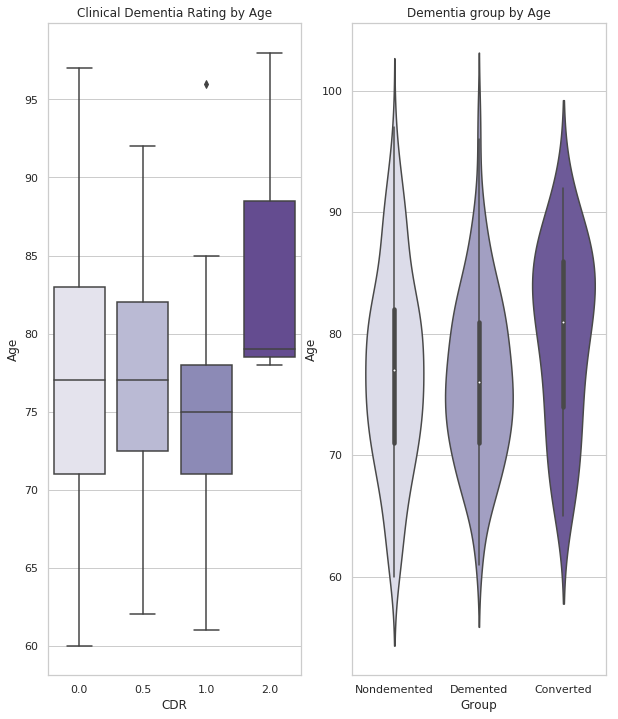

In [192]:
plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.title(label = 'Clinical Dementia Rating by Age')
sns.boxplot(x='CDR', y='Age', data=longitudinal, palette = 'Purples') 
plt.subplot(1,2,2)
plt.title(label = 'Dementia group by Age')
sns.violinplot(x='Group', y='Age', data=longitudinal, palette = 'Purples')


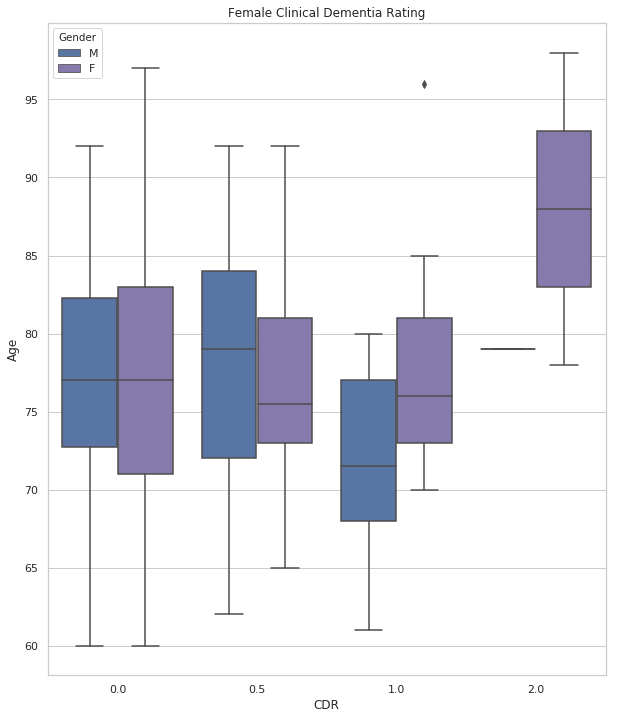

In [193]:
plt.figure(figsize=(10,12))

female_dementia = longitudinal[longitudinal['Gender']=='F']
male_dementia = longitudinal[longitudinal['Gender']=='M']
plt.title(label = 'Female Clinical Dementia Rating')
my_pal = {"F": "m", "M": "b"}
sns.boxplot(x='CDR', y='Age', hue='Gender', palette=my_pal, data=longitudinal)


### Histograms

In [0]:
def hist_plot(ttl, data, axl, clr, tfkde):
  plt.title(label = ttl)
  ax = sns.distplot(data, axlabel=axl, color=clr, kde=tfkde)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)


In [0]:
longitudinal_dropped = longitudinal[longitudinal.MMSE.notna()]

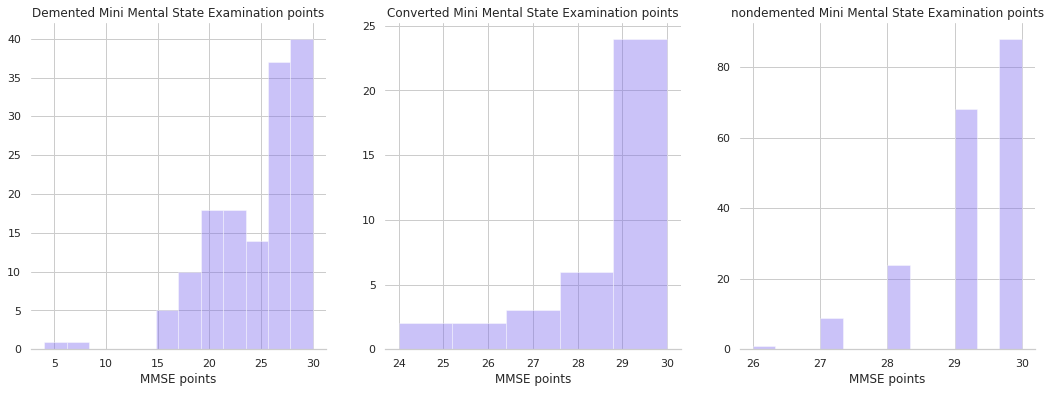

In [196]:
nwbv_demented = longitudinal_dropped[longitudinal_dropped['Group']=='Demented'].MMSE
nwbv_nondemented = longitudinal_dropped[longitudinal_dropped['Group']=='Nondemented'].MMSE
nwbv_converted = longitudinal_dropped[longitudinal_dropped['Group']=='Converted'].MMSE
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
hist_plot('Demented Mini Mental State Examination points', nwbv_demented, 'MMSE points', 'mediumslateblue', False)
plt.subplot(1,3,2)
hist_plot('Converted Mini Mental State Examination points', nwbv_converted, 'MMSE points', 'mediumslateblue', False)
plt.subplot(1,3,3)
hist_plot('nondemented Mini Mental State Examination points', nwbv_nondemented, 'MMSE points', 'mediumslateblue', False)

A higher distribution of MMSE rezults in demented subjects. As well as lower scores.

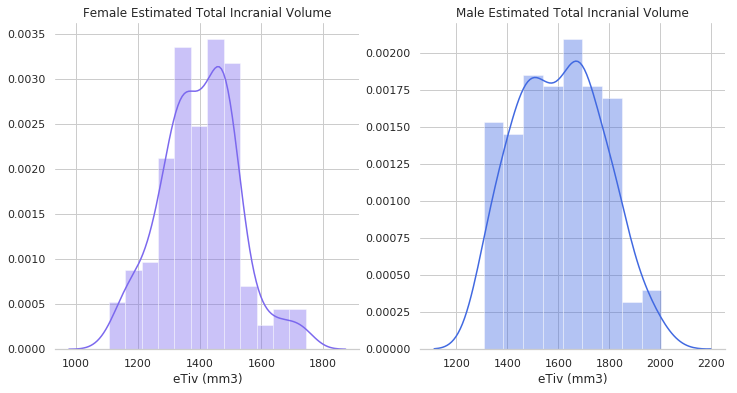

In [197]:
etiv_values_male = male_dementia.eTIV
etiv_values_female = female_dementia.eTIV
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
hist_plot('Female Estimated Total Incranial Volume', etiv_values_female, 'eTiv (mm3)', 'mediumslateblue', True)
plt.subplot(1,2,2)
hist_plot('Male Estimated Total Incranial Volume', etiv_values_male, 'eTiv (mm3)', 'royalblue', True)

Estimated Total Incranial Volume doesn't play much of a role in Dementia.
This Chart is just an interesting comparison.

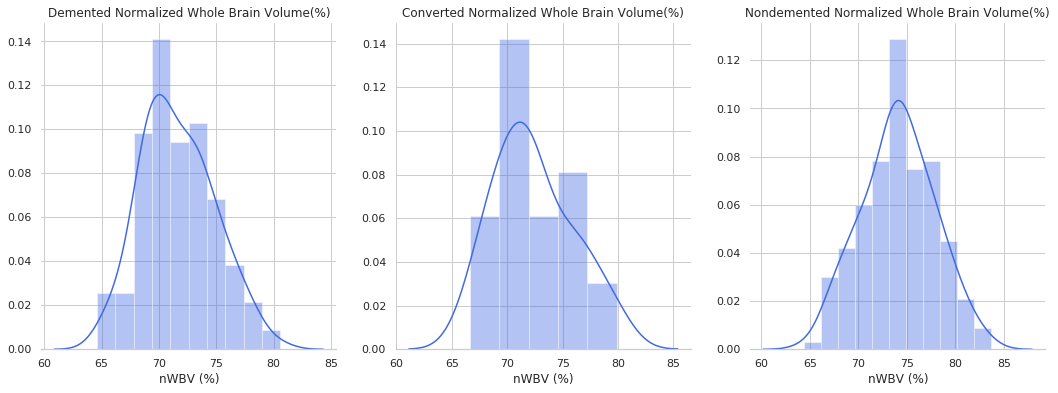

In [198]:
nwbv_demented = longitudinal[longitudinal['Group']=='Demented'].nWBV
nwbv_nondemented = longitudinal[longitudinal['Group']=='Nondemented'].nWBV
nwbv_converted = longitudinal[longitudinal['Group']=='Converted'].nWBV
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
hist_plot('Demented Normalized Whole Brain Volume(%)', nwbv_demented, 'nWBV (%)', 'royalblue', True)
plt.subplot(1,3,2)
hist_plot('Converted Normalized Whole Brain Volume(%)', nwbv_converted, 'nWBV (%)', 'royalblue', True)
plt.subplot(1,3,3)
hist_plot('Nondemented Normalized Whole Brain Volume(%)', nwbv_nondemented, 'nWBV (%)', 'royalblue',True)

A slight trend for decreasing Normalized Whole Brain Volume with the presence of Dementia

In [0]:
def bar_plot(ttl, x, y, data, clr, hue=None):
  plt.title(label = ttl)
  ax = sns.barplot(x=x, y=y, data=data, palette=clr, hue=hue)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

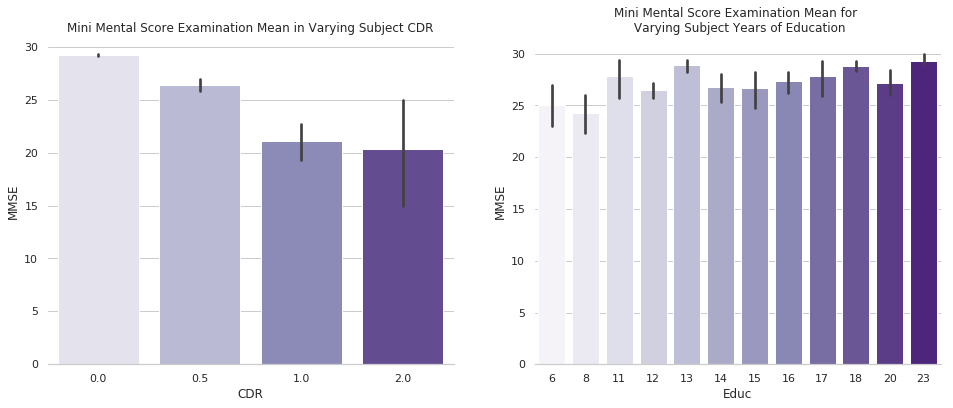

In [200]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
bar_plot('Mini Mental Score Examination Mean in Varying Subject CDR', "CDR", "MMSE", longitudinal_dropped, 'Purples')
plt.subplot(1,2,2)
bar_plot('Mini Mental Score Examination Mean for \n Varying Subject Years of Education', "Educ", "MMSE", longitudinal_dropped, 'Purples')

Seems like in this data set lower education is associated with a greater risk for dementia.

For further reading:
* [The Relationship between Education and Dementia An Updated Systematic Review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3193875/)

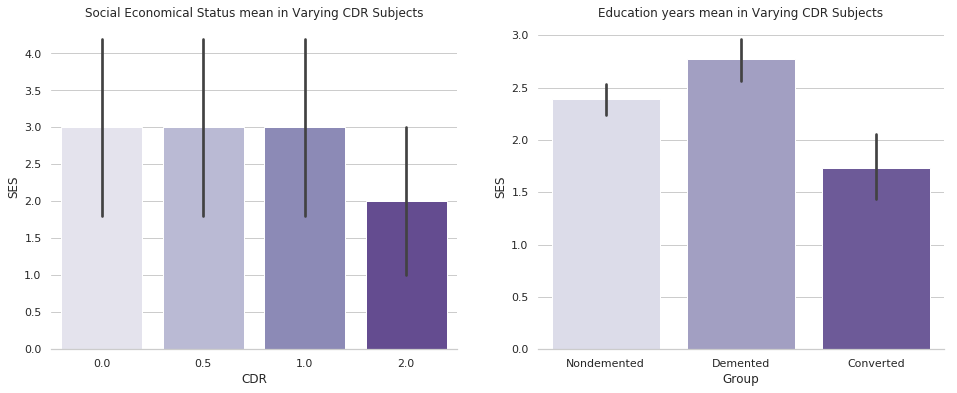

In [201]:

data = longitudinal.groupby(['SES','CDR']).count().reset_index()
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
bar_plot('Social Economical Status mean in Varying CDR Subjects', "CDR", "SES", data, 'Purples')
plt.subplot(1,2,2)
bar_plot('Education years mean in Varying CDR Subjects', "Group", "SES", longitudinal, 'Purples')

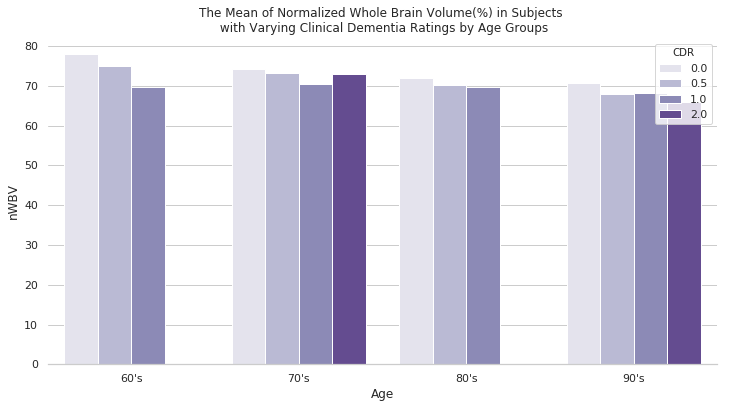

In [202]:
plt.figure(figsize=(12,6))
age_group = longitudinal.groupby([(longitudinal.Age//10)*10, 'CDR']).mean().drop('Age' ,axis=1).reset_index()
age_group['Age'] = age_group['Age'].astype(str) + '\'s'
age_group
bar_plot('The Mean of Normalized Whole Brain Volume(%) in Subjects \n with Varying Clinical Dementia Ratings by Age Groups', 'Age', 'nWBV', age_group, 'Purples', 'CDR')

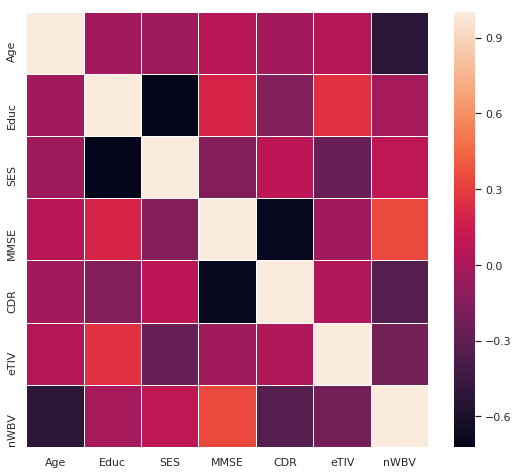

In [203]:
data = longitudinal[['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV']]
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)
plt.show()

In [204]:
print(corrmat)

           Age      Educ       SES      MMSE       CDR      eTIV      nWBV
Age   1.000000 -0.027886 -0.046857  0.055612 -0.026257  0.042348 -0.518359
Educ -0.027886  1.000000 -0.722647  0.194884 -0.153121  0.257015 -0.012200
SES  -0.046857 -0.722647  1.000000 -0.149219  0.076160 -0.261575  0.090095
MMSE  0.055612  0.194884 -0.149219  1.000000 -0.686519 -0.032084  0.341912
CDR  -0.026257 -0.153121  0.076160 -0.686519  1.000000  0.022819 -0.344819
eTIV  0.042348  0.257015 -0.261575 -0.032084  0.022819  1.000000 -0.210122
nWBV -0.518359 -0.012200  0.090095  0.341912 -0.344819 -0.210122  1.000000


### Conclusions

* In particular, **eTIV** was shown to differ little with
age and dementia status. **nWBV**, on the other hand, was shown to decline across the adult life span with acceleration in advanced aging, consistent with findings from a broad
range of studies (see DeCarli et al., 2005; Fotenos et al.,
2005; Sowell, Thompson, & Toga, 2004; Durston, 2003;
Blatter et al., 1995, for reviews)
* Normalized whole brain volume has a negative correlation with Clinical Dementia Rating.
* Clinical Dementia Rating has a negative correlation with Mini Mental State Examination. MMSE the normal score for healthy adults is the maximum: 30. A sign of Dementia is cognitive function decline.
* Educated adults seem to be less prone to Dementia.
* Other relationships can be seen in the correlation heatmap.

![Alzheimers disease brain comparison](https://upload.wikimedia.org/wikipedia/commons/a/a5/Alzheimer%27s_disease_brain_comparison.jpg)

### For further reading

* [*Alzheimer's asspciation*](https://www.alz.org/alzheimers-dementia/facts-figures)
* [*Normative estimates of cross-sectional and longitudinal brain volume decline in aging and AD*](https://n.neurology.org/content/64/6/1032)
* [*A prospective study of cognitive function and onset of dementia in cognitively healthy elders.*](https://www.ncbi.nlm.nih.gov/pubmed/9520014)
* [*Mild Cognitive Impairment Represents Early-Stage Alzheimer Disease*](https://jamanetwork.com/journals/jamaneurology/fullarticle/778838)
* [*Longitudinal MRI Data in Nondemented and Demented Older Adults*](https://www.researchgate.net/publication/40022806_Open_Access_Series_of_Imaging_Studies_Longitudinal_MRI_Data_in_Nondemented_and_Demented_Older_Adults)
* [*Cross-sectional
MRI Data in Young, Middle Aged,
Nondemented, and Demented Older Adults*](https://www.ncbi.nlm.nih.gov/pubmed/17714011)
* [*Dementia*](https://www.who.int/news-room/fact-sheets/detail/dementia)
* [*MRI Basics*](https://casemed.case.edu/clerkships/neurology/Web%20Neurorad/MRI%20Basics.htm)

### The Clinical Dementia Rating (CDR): Current version and scoring rules.

Clinical Dementia Rating Scale is an instrument used in clinical and research of Dementia settings to assess the severity.

Abstract

Describes the scoring rules for the Washington University CDR, which is derived from a semistructured interview with the patient and an appropriate informant and rates impairment in each of 6 cognitive categories (Memory, Orientation, Judgment and Problem Solving [JPS], Community Affairs [CAF], Home and Hobbies, and Personal Care). A new version of the CDR is presented that more appropriately uses information regarding performance of financial transactions for rating JPS rather than CAF

AD - alzhaimers disease

The CDR rates the severity of AD using a 5-point scale that rates the severity of signs and symptoms as they affect the patient’s ability to function in the 6 cognitive categories of memory, orientation, judgment and problem solving, community affairs/involvement, home life and hobbies, and personal care. Although designed for use with patients with a probable diagnosis of AD, the CDR is appropriate for use in the assessment of dementia that is associated with other medical disorders (e.g., Lewy body disease)

The CDR is completed by the researcher or a clinician after performing a
face-to-face, semi-structured interview with the patient and a reliable informant (e.g.,spouse or other family member/caregiver). The informant is interviewed first, and the results of that interview are used to assess patient recall of events and to confirm the accuracy of patient responses. In each cognitive category the patient receives a score of 0 (no cognitive impairment) to 3 (severe cognitive impairment). The CDR can be
scored to obtain a global score by using an algorithm that weights memory more heavily than the other categories, or it can be scored using the sum of boxes (SOB) method in which all categories are weighted equally; in general, the higher the score, the greater the severity of dementia

### Mini-Mental State Exam (MMSE)

The Mini-Mental State Exam (MMSE) is a widely used test of cognitive function
among the elderly; it includes tests of orientation, attention, memory, language
and visual-spatial skills. [MMSE](https://www.ncbi.nlm.nih.gov/projects/gap/cgi-bin/GetPdf.cgi?id=phd001525.1)


**Clinical**

* Mini-Mental State Examination (**MMSE**) (Rubin et al., 1998),  (range is from 0 = worst to 30 = best)
* Clinical Dementia Rating (**CDR**; 0=nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia) (Morris, 1993). All participants with dementia (CDR >0) were diagnosed with probable AD. 

**Derived anatomic volumes**

* **eTIV** Estimated total intracranial volume (mm3) (Buckner et al., 2004),
* **nWBV** Normalized whole brain volume.

    Expressed as the percent of all
    voxels in the atlas-masked image
    that are labeled as gray or white
    matter by the automated tissue
    segmentation process (Fotenos
    et al., 2005)
